# Importing Library

In [3]:
import pandas as pd                 #import pandas with the alias pd
import numpy as np                  #import numpy with the alias np
import matplotlib.pyplot as plt     #impot matplotlib.pyplot with the alias plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm, feature_selection, linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score

# Part 1

## Data Munging (Data Cleaning and Transformation)

### Reading File

In [50]:
df_diabetic_csv = pd.read_csv('diabetic_data.csv')

### Shape of the Dataframe

In [51]:
df_diabetic_csv.shape

(101766, 50)

### Deleting the "encounter_id" Column

In [52]:
df_diabetic_csv.drop('encounter_id', axis=1, inplace=True)

### Shape of the Dataframe after deleting the column

In [53]:
df_diabetic_csv.shape

(101766, 49)

### Identifing the missing values in dataframe

In [54]:
df_summary_missing = df_diabetic_csv.isnull().sum()
df_summary_missing

patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Replacing the character '?' with NaN

In [55]:
df_diabetic_csv = df_diabetic_csv.replace('?', np.nan)

### Summary of missing values in the dataframe after replacing '?' with NaN

In [56]:
df_summary_missing = df_diabetic_csv.isnull().sum()
print(df_summary_missing)

patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Replacing the values ‘<30’ with a 1 and ‘>30’ and ‘NO’ to 0 in "readmitted" column

In [57]:
df_diabetic_csv['readmitted'] = df_diabetic_csv['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

C:\Users\pruthviraj.s\AppData\Local\Temp\ipykernel_21440\4231981717.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_diabetic_csv['readmitted'] = df_diabetic_csv['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})


### Datatypes of each column

In [58]:
df_column_data_types = df_diabetic_csv.dtypes
df_column_data_types

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

### Calculate the percentage of missing values in each column

In [59]:
missing_values_percentage = (df_diabetic_csv.isnull().mean() * 100)
missing_values_percentage

patient_nbr                  0.000000
race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum               94.746772
A1Cresult                   83.277322
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropami

In [60]:
columns_to_drop = missing_values_percentage[missing_values_percentage > 90].index

# Drop the identified columns from the DataFrame
df = df_diabetic_csv.drop(columns=columns_to_drop)
df.shape

(101766, 47)

### Droping the columns with more than 90% missing values

In [47]:
df_diabetic_csv = df_diabetic_csv.dropna(thresh=len(df_diabetic_csv)*0.1, axis=1)

In [48]:
df_diabetic_csv.shape

(101766, 47)

In [15]:
zero_variance_columns = ['examide','citoglipton','nateglinide','chlorpropamide','glimepiride',
                         'acetohexamide','tolbutamide','acarbose','miglitol','troglitazone','tolazamide',
                         'examide','citoglipton','glyburide-metformin','glipizide-metformin','glimepiride-pioglitazone',
                         'metformin-rosiglitazone','metformin-pioglitazone']

In [16]:
df_diabetic_csv = df_diabetic_csv.drop(columns=zero_variance_columns)

In [17]:
df_diabetic_csv.shape

(101766, 31)

In [18]:
df_diabetic_csv = df_diabetic_csv.dropna()

In [19]:
df_diabetic_csv.shape

(4166, 31)

In [20]:
# df_numerical_columns = df_diabetic_csv.select_dtypes(include=[np.number]).columns
df_numerical_columns = df_diabetic_csv.select_dtypes(include=['int64','float64']).columns
numerical_summary = df_diabetic_csv[df_numerical_columns].describe()
print(numerical_summary)

        patient_nbr  admission_type_id  discharge_disposition_id  \
count  4.166000e+03        4166.000000               4166.000000   
mean   6.124034e+07           1.833413                  2.697312   
std    3.936169e+07           0.753764                  4.024514   
min    7.290000e+02           1.000000                  1.000000   
25%    2.480188e+07           1.000000                  1.000000   
50%    5.984079e+07           2.000000                  1.000000   
75%    9.483692e+07           2.000000                  3.000000   
max    1.886349e+08           6.000000                 28.000000   

       admission_source_id  time_in_hospital  num_lab_procedures  \
count          4166.000000       4166.000000         4166.000000   
mean              5.148104          4.944311           53.853577   
std               2.673494          3.107173           16.695628   
min               1.000000          1.000000            1.000000   
25%               1.000000          3.000000   

In [21]:
# for q_col in df_diabetic_csv.select_dtypes(include=['int64','float64']).columns:
for q_col in df_numerical_columns:
    Q1 = np.percentile(df_diabetic_csv[q_col], 25)
    Q3 = np.percentile(df_diabetic_csv[q_col], 75)
    IQR = Q3 - Q1

    u_Q = Q3+1.5*IQR
    l_Q = Q1-1.5*IQR

    df_diabetic_csv = df_diabetic_csv [(df_diabetic_csv[q_col]>=l_Q) & (df_diabetic_csv[q_col]<=u_Q)]
    
    print(q_col,Q1,Q3,IQR,u_Q,l_Q)
df_diabetic_csv.shape
df_diabetic_csv.columns.values

patient_nbr 24801880.5 94836917.25 70035036.75 199889472.375 -80250674.625
admission_type_id 1.0 2.0 1.0 3.5 -0.5
discharge_disposition_id 1.0 3.0 2.0 6.0 -2.0
admission_source_id 1.0 7.0 6.0 16.0 -8.0
time_in_hospital 3.0 7.0 4.0 13.0 -3.0
num_lab_procedures 43.0 65.0 22.0 98.0 10.0
num_procedures 0.0 2.0 2.0 5.0 -3.0
num_medications 10.0 20.0 10.0 35.0 -5.0
number_outpatient 0.0 0.0 0.0 0.0 0.0
number_emergency 0.0 0.0 0.0 0.0 0.0
number_inpatient 0.0 0.0 0.0 0.0 0.0
number_diagnoses 5.0 9.0 4.0 15.0 -1.0
readmitted 0.0 0.0 0.0 0.0 0.0


array(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'A1Cresult',
       'metformin', 'repaglinide', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change',
       'diabetesMed', 'readmitted'], dtype=object)

In [22]:
def data_normalize(data_to_norm):
    # if the data passed to the function is dataframe
    print(data_to_norm.min(),data_to_norm.max(),'\n')
    if(isinstance(data_to_norm,pd.DataFrame)):
        num_cols=data_to_norm.select_dtypes(include=[np.number]).copy()
        data_norm_data=((num_cols-num_cols.min())/(num_cols.max()- num_cols.min()))
        return data_norm_data
    
    # if the data passed to the function is only a column
    else:
        data_norm_data=((data_to_norm-data_to_norm.min())/(data_to_norm.max()- data_to_norm.min()))
        return data_norm_data

In [23]:
# df_price_norm=data_normalize(df_manhattan12_csv['SALE PRICE'])
df_diabetic_norm = data_normalize(df_diabetic_csv)
print(df_diabetic_norm.shape)
df_diabetic_norm.columns.values

patient_nbr                             729
race                        AfricanAmerican
gender                               Female
age                                  [0-10)
admission_type_id                         1
discharge_disposition_id                  1
admission_source_id                       1
time_in_hospital                          1
payer_code                               BC
medical_specialty                Cardiology
num_lab_procedures                       10
num_procedures                            0
num_medications                           1
number_outpatient                         0
number_emergency                          0
number_inpatient                          0
diag_1                                   11
diag_2                                  110
diag_3                                  110
number_diagnoses                          3
A1Cresult                                >7
metformin                              Down
repaglinide                     

array(['patient_nbr', 'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'readmitted'], dtype=object)

## Data Visualisation

In [24]:
print(df_diabetic_csv.head(5))

       patient_nbr             race  gender      age  admission_type_id  \
23879      7239654        Caucasian  Female  [70-80)                  1   
24069     14244093        Caucasian  Female  [30-40)                  1   
24117       537543        Caucasian  Female  [30-40)                  2   
24177       354474        Caucasian    Male  [70-80)                  2   
24228      1186533  AfricanAmerican  Female  [30-40)                  1   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
23879                         3                    6                12   
24069                         1                    6                13   
24117                         1                    4                11   
24177                         3                    1                12   
24228                         1                    6                 6   

      payer_code medical_specialty  ...  metformin  repaglinide  glipizide  \
23879         UN  Internal

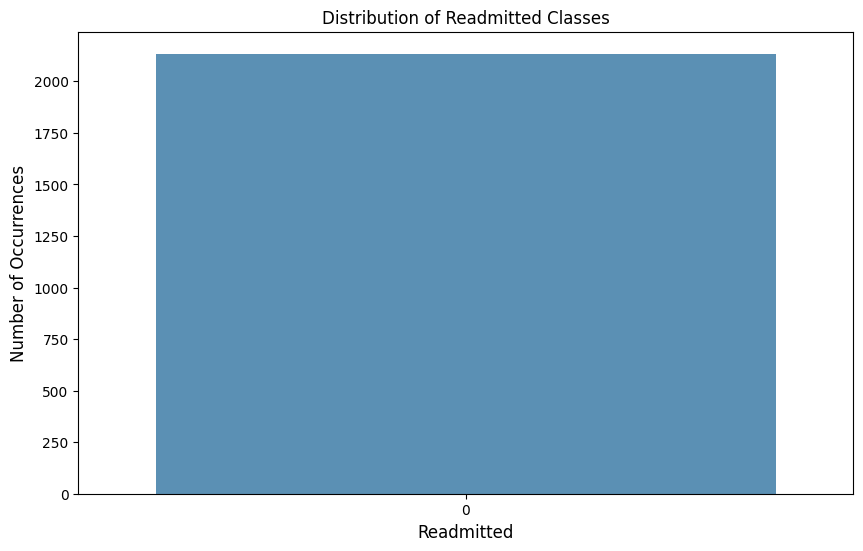

In [25]:
class_counts = df_diabetic_csv['readmitted'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Distribution of Readmitted Classes')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Readmitted', fontsize=12)
plt.show()

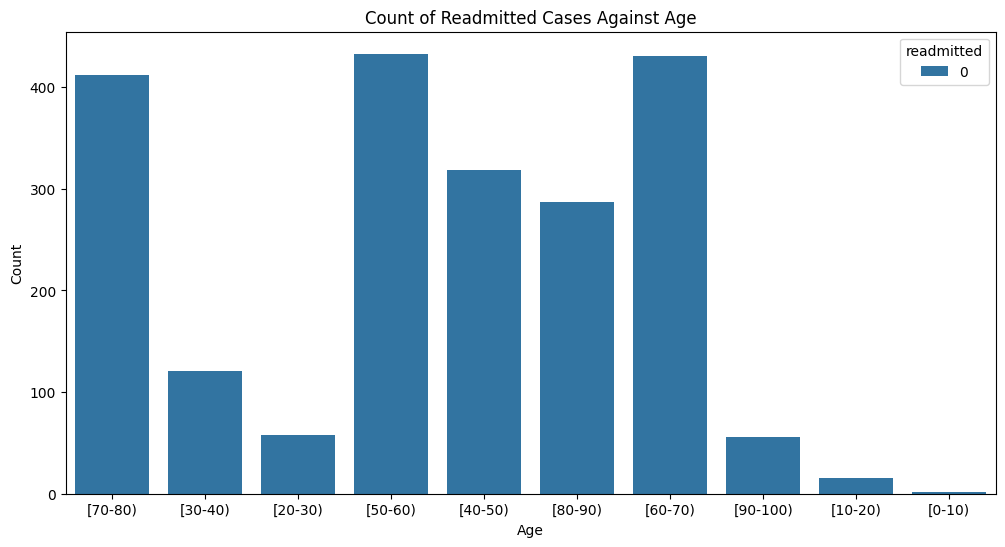

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(x='age', hue='readmitted', data=df_diabetic_csv)
plt.title('Count of Readmitted Cases Against Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

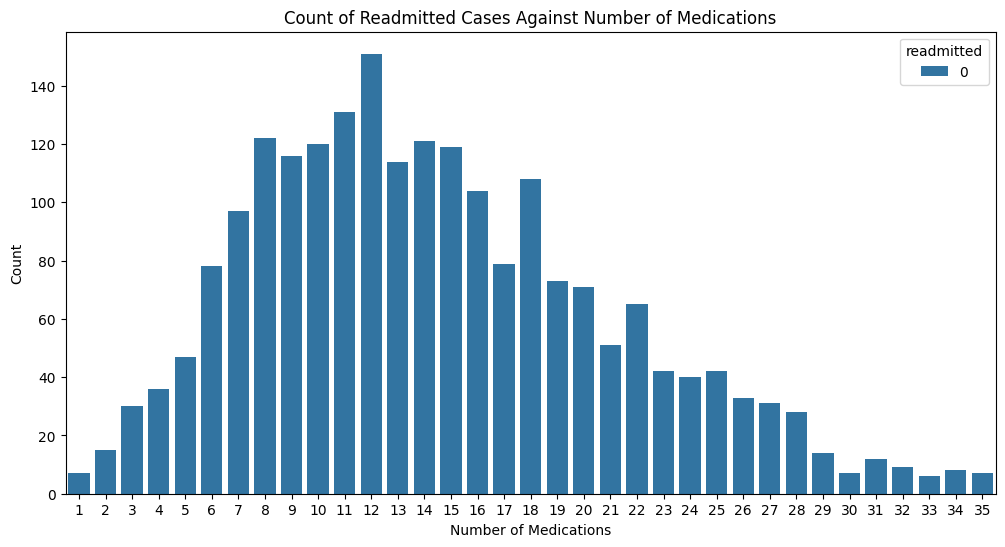

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='num_medications', hue='readmitted', data=df_diabetic_csv)
plt.title('Count of Readmitted Cases Against Number of Medications')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.show()

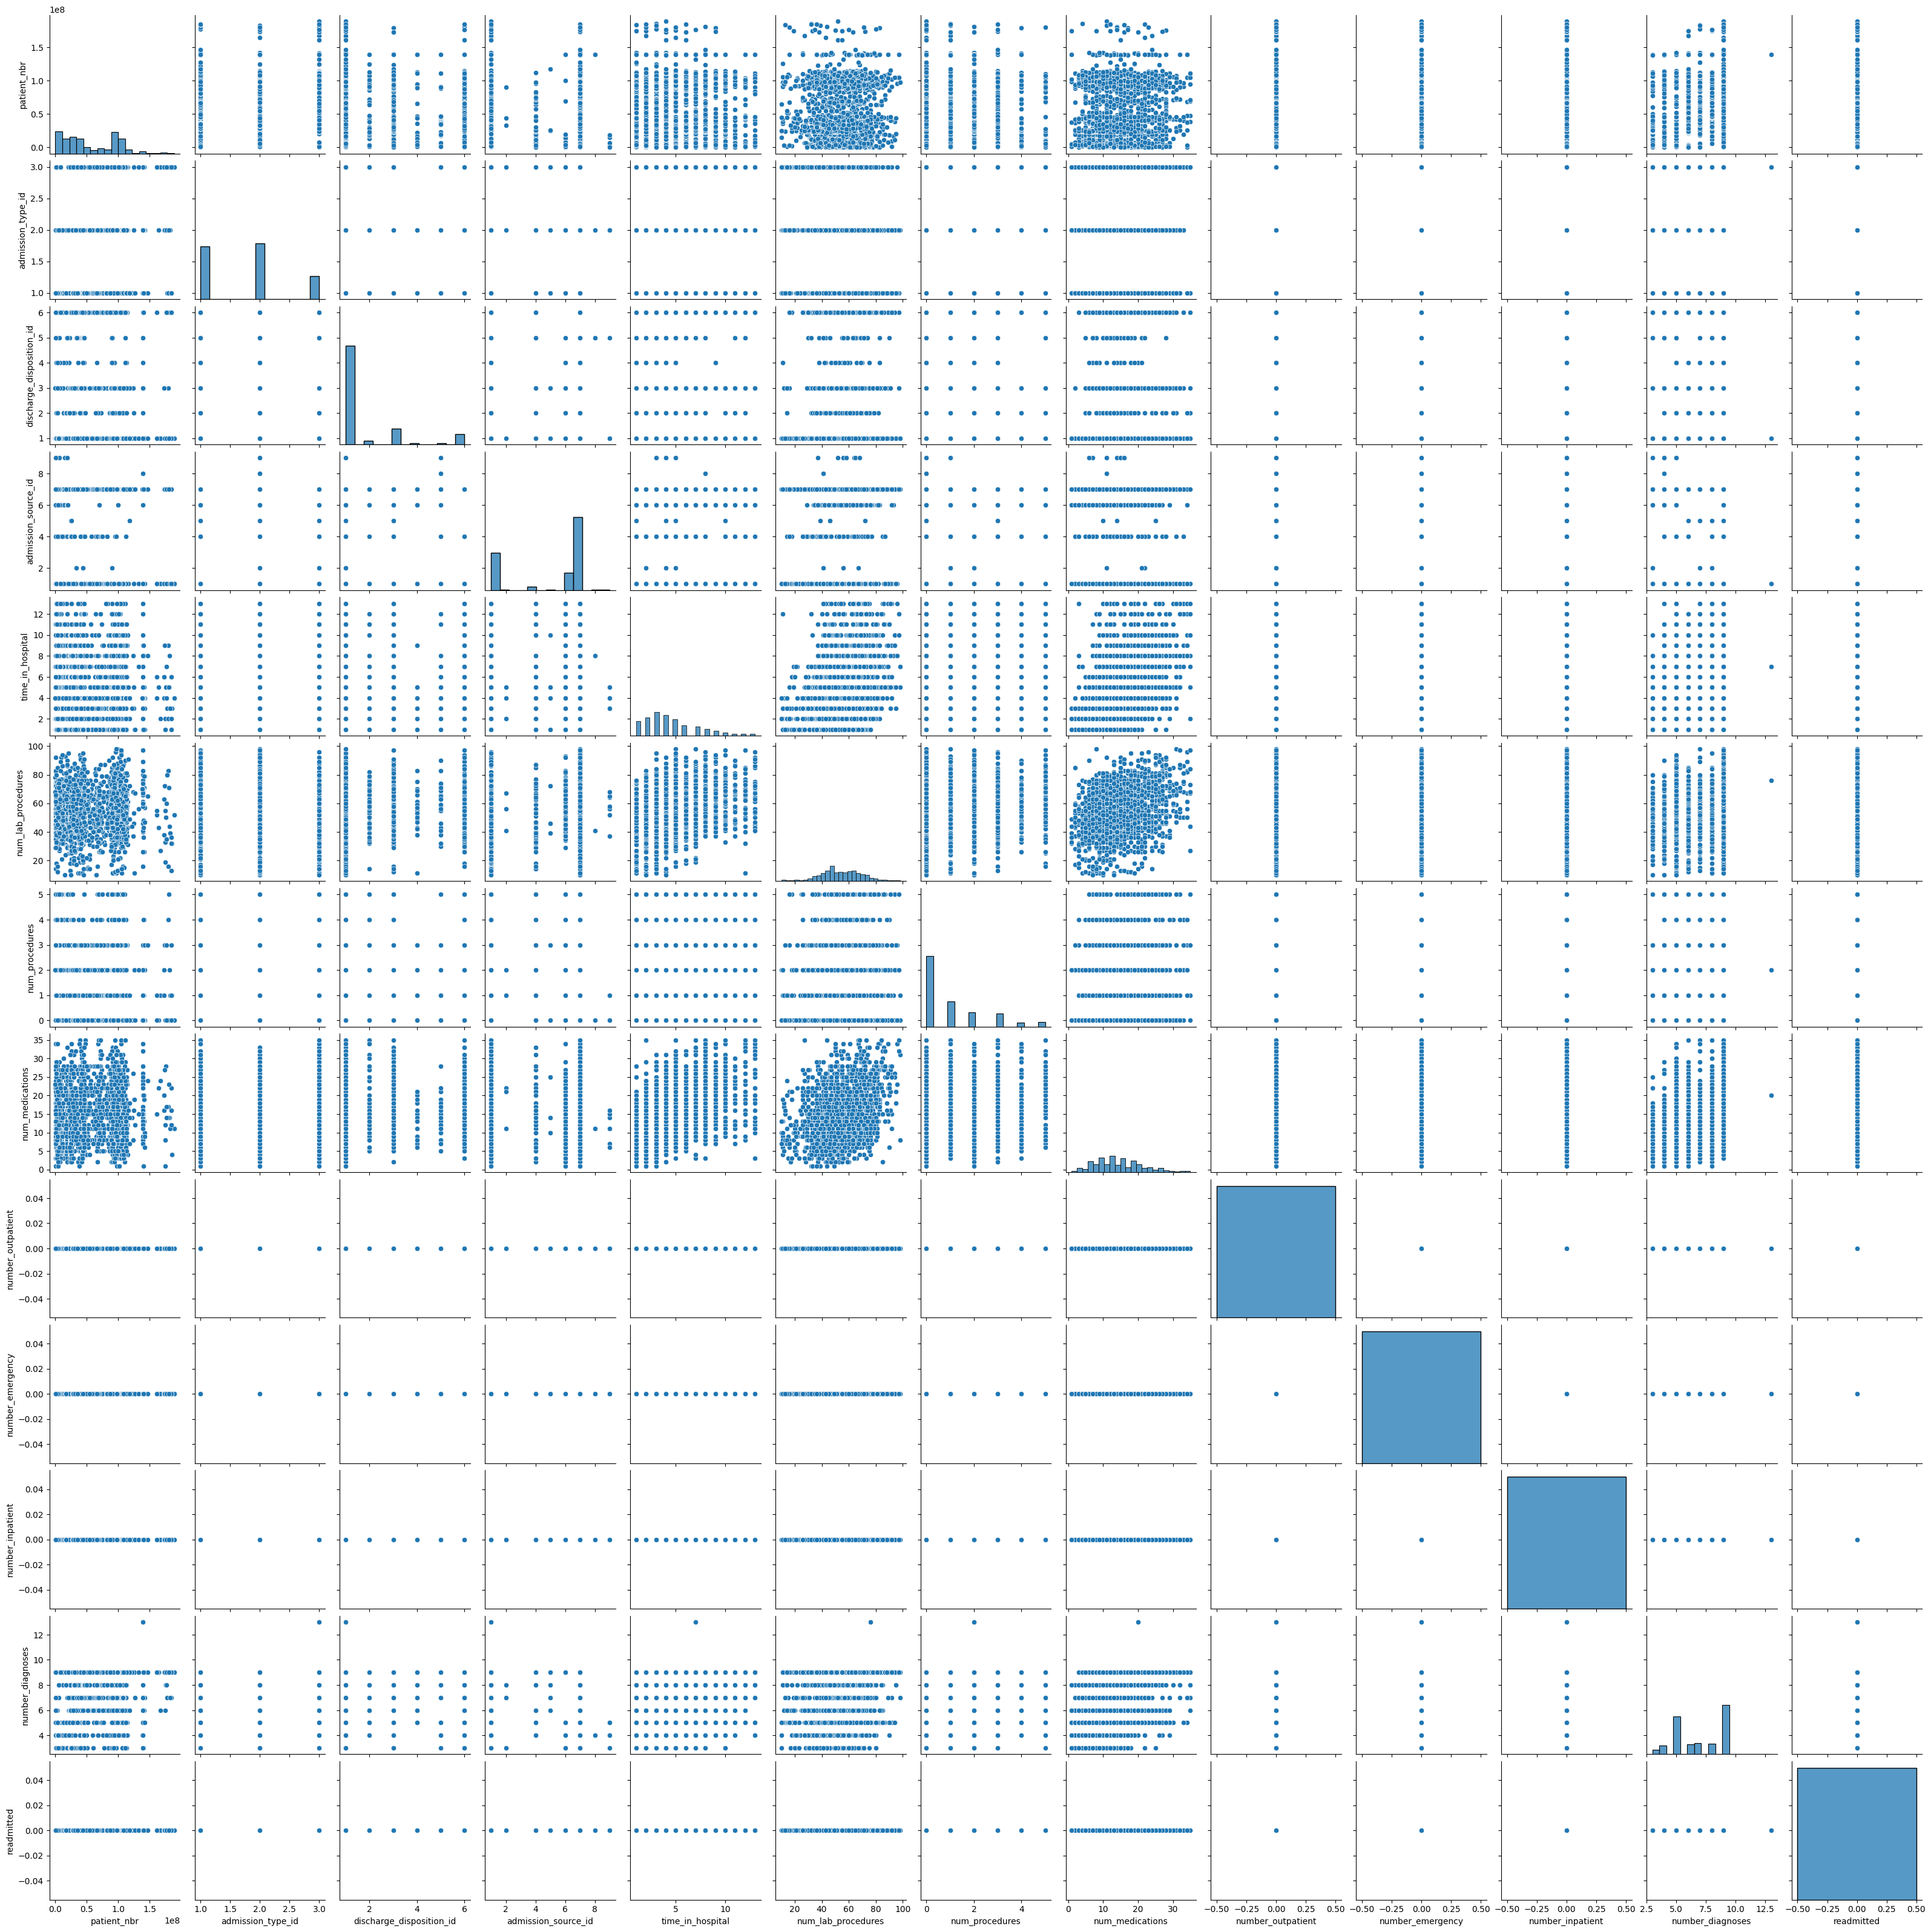

In [28]:
sns.pairplot(df_diabetic_csv)

In [29]:
print(df_diabetic_csv['discharge_disposition_id'].unique())

[3 1 2 6 5 4]


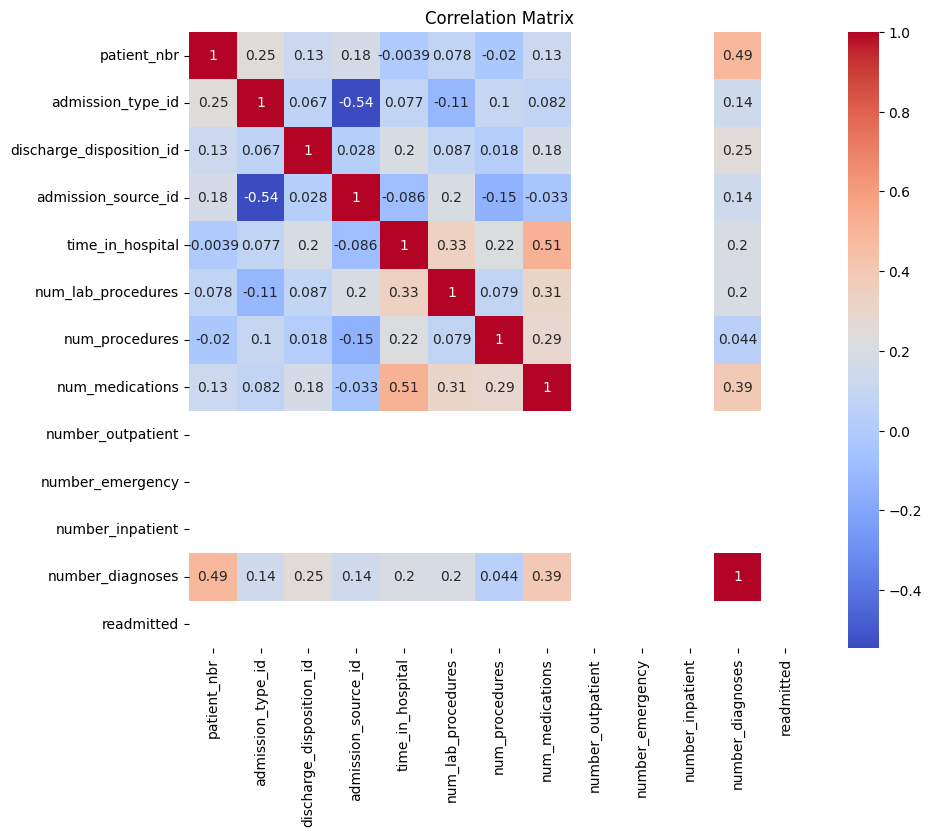

In [30]:
numerical_cols = df_diabetic_csv.select_dtypes(include=[np.number])

# Calculate correlation matrix
corr_matrix = numerical_cols.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [31]:
#need to do more visualization

## Model Building

# Part 2

## Improved Model

In [32]:
import binascii
dataWithout_crc8 = ["11", "01","00","00","00","00","00"]
# dataWithout_crc8 = ["11", "01","02","03","04","05","06","06"]
# dle_etx = ["10", "03"]

postive_response = bytearray.fromhex(hex(int(dataWithout_crc8[0],16)+0x40)[2:])
postive_response = binascii.hexlify(postive_response)
print(postive_response)

b'51'
